In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [66]:
%run './imports.ipynb'

In [67]:
def get_ids(folder_path):
    # Get all the files in the folder
    files = os.listdir(folder_path)
    # Extract the IDs from the filenames
    ids = []
    for file in files:
        if file.endswith("-cgc.xlsx"):
            id_val = file[:-len("-cgc.xlsx")]
            try:
                id_val = int(id_val)
                ids.append(id_val)
            except ValueError:
                print(f"Warning: Invalid ID format in filename '{file}'. Skipping.")

    return ids

In [68]:
data = {
    'Alpha': [0, 0, 0, 0, 0, 0, 0, 0],
    'Beta': [0, 0, 0, 0, 0, 0, 0, 0],
    'Delta': [0, 0, 0, 0, 0, 0, 0, 0],
    'Gamma1': [0, 0, 0, 0, 0, 0, 0, 0],
    'Gamma2': [0, 0, 0, 0, 0, 0, 0, 0],
    'Sigma': [0, 0, 0, 0, 0, 0, 0, 0],
    'Theta': [0, 0, 0, 0, 0, 0, 0, 0],
    'hr': [0, 0, 0, 0, 0, 0, 0, 0]
}
frame_awake = pd.DataFrame(data, index=['Alpha', 'Beta', 'Delta', 'Gamma1', 'Gamma2', 'Sigma', 'Theta', 'hr'])
lr = np.array([0,0,0,0,0,0,0])
lc = np.array([0,0,0,0,0,0,0])

ids = get_ids('./Outputs/LSTM_CGC/Healthy_male')
# id = 200081
for id in ids:
  df = pd.read_excel('./Outputs/TDS/Healthy_male/{}_c_awake.xlsx'.format(id), sheet_name='hr')
  df = df.sort_values(by='index')
  if 'score' in df.columns:
    score = df['score'].to_numpy()
  else:
    score = np.array([0, 0, 0, 0, 0, 0, 0])
  df = pd.read_excel('./Outputs/LSTM_CGC/Healthy_male/{}-cgc.xlsx'.format(id), sheet_name='awake')
  df.set_index('Unnamed: 0', inplace=True)
  df.index.name = None
  a1 = df.iloc[:-1, -1].to_numpy()
  a1 = a1 * score
  lc = lc + a1
  a2 = df.iloc[-1,:-1].astype(int).to_numpy()
  a2 = a2 * score
  lr = lr + a2
  print('id', id)
  print('col:', a1)
  print('row:', a2)
  print('score:', score)

frame_awake.iloc[:-1, -1] = lc
frame_awake.iloc[-1, :-1] = lr
print(frame_awake)


id 200558
col: [0 0 0 0 0 0 0]
row: [0 0 0 0 0 0 0]
score: [0 0 0 0 0 0 0]
id 200575
col: [0 0 0 0 0 0 0]
row: [0 0 0 0 0 0 0]
score: [0 0 0 0 0 0 0]
id 200614
col: [0 0 0 0 0 0 0]
row: [0 0 0 0 0 0 0]
score: [0 0 0 0 0 0 0]
id 200563
col: [0 0 0 0 0 0 0]
row: [0 0 0 0 0 0 0]
score: [0 0 0 0 0 0 0]
id 200591
col: [0 0 0 0 0 0 0]
row: [0 0 0 0 0 0 0]
score: [0 0 0 0 0 0 0]
id 200612
col: [0 0 0 0 0 0 0]
row: [0 0 0 0 0 0 0]
score: [0 0 0 0 0 0 0]
id 200589
col: [0 0 0 0 0 0 0]
row: [0 0 0 0 0 0 0]
score: [0 0 0 0 0 0 0]
id 200440
col: [0 0 0 0 0 0 0]
row: [0 0 0 0 0 0 0]
score: [0 0 0 0 0 0 0]
id 200437
col: [0 0 0 0 0 0 0]
row: [0 0 0 0 0 0 0]
score: [0 0 0 0 0 0 0]
id 200394
col: [0 0 0 0 0 0 0]
row: [0 0 0 0 0 0 0]
score: [0 0 0 0 0 0 0]
id 200223
col: [0 0 0 0 0 0 0]
row: [0 0 0 0 0 0 0]
score: [0 0 0 0 0 0 0]
id 200445
col: [0 0 0 0 0 0 0]
row: [0 0 0 0 0 0 0]
score: [0 0 0 0 0 0 0]
id 200389
col: [0 0 0 0 0 0 0]
row: [0 0 0 0 0 0 0]
score: [0 0 0 0 0 0 0]
id 200434
col: [0 0 0 0 0

In [69]:
data = {
    'Alpha': [0, 0, 0, 0, 0, 0, 0, 0],
    'Beta': [0, 0, 0, 0, 0, 0, 0, 0],
    'Delta': [0, 0, 0, 0, 0, 0, 0, 0],
    'Gamma1': [0, 0, 0, 0, 0, 0, 0, 0],
    'Gamma2': [0, 0, 0, 0, 0, 0, 0, 0],
    'Sigma': [0, 0, 0, 0, 0, 0, 0, 0],
    'Theta': [0, 0, 0, 0, 0, 0, 0, 0],
    'hr': [0, 0, 0, 0, 0, 0, 0, 0]
}
frame_n12 = pd.DataFrame(data, index=['Alpha', 'Beta', 'Delta', 'Gamma1', 'Gamma2', 'Sigma', 'Theta', 'hr'])
lr = np.array([0,0,0,0,0,0,0])
lc = np.array([0,0,0,0,0,0,0])

ids = get_ids('./Outputs/LSTM_CGC/Healthy_male')
# id = 200081
for id in ids:
  df = pd.read_excel('./Outputs/TDS/Healthy_male/{}_c_ls.xlsx'.format(id), sheet_name='hr')
  df = df.sort_values(by='index')
  if 'score' in df.columns:
    score = df['score'].to_numpy()
  else:
    score = np.array([0, 0, 0, 0, 0, 0, 0])
  df = pd.read_excel('./Outputs/LSTM_CGC/Healthy_male/{}-cgc.xlsx'.format(id), sheet_name='n12')
  df.set_index('Unnamed: 0', inplace=True)
  df.index.name = None
  a1 = df.iloc[:-1, -1].to_numpy()
  a1 = a1 * score
  lc = lc + a1
  a2 = df.iloc[-1,:-1].astype(int).to_numpy()
  a2 = a2 * score
  lr = lr + a2

frame_n12.iloc[:-1, -1] = lc
frame_n12.iloc[-1, :-1] = lr

frame_n12

,Alpha,Beta,Delta,Gamma1,Gamma2,Sigma,Theta,hr
Alpha,0,0,0,0,0,0,0,0
Beta,0,0,0,0,0,0,0,1
Delta,0,0,0,0,0,0,0,0
Gamma1,0,0,0,0,0,0,0,1
Gamma2,0,0,0,0,0,0,0,2
Sigma,0,0,0,0,0,0,0,0
Theta,0,0,0,0,0,0,0,0
hr,0,1,0,0,3,0,0,0


In [70]:
data = {
    'Alpha': [0, 0, 0, 0, 0, 0, 0, 0],
    'Beta': [0, 0, 0, 0, 0, 0, 0, 0],
    'Delta': [0, 0, 0, 0, 0, 0, 0, 0],
    'Gamma1': [0, 0, 0, 0, 0, 0, 0, 0],
    'Gamma2': [0, 0, 0, 0, 0, 0, 0, 0],
    'Sigma': [0, 0, 0, 0, 0, 0, 0, 0],
    'Theta': [0, 0, 0, 0, 0, 0, 0, 0],
    'hr': [0, 0, 0, 0, 0, 0, 0, 0]
}
frame_n34 = pd.DataFrame(data, index=['Alpha', 'Beta', 'Delta', 'Gamma1', 'Gamma2', 'Sigma', 'Theta', 'hr'])
lr = np.array([0,0,0,0,0,0,0])
lc = np.array([0,0,0,0,0,0,0])

ids = get_ids('./Outputs/LSTM_CGC/Healthy_male')
# id = 200081
for id in ids:
  df = pd.read_excel('./Outputs/TDS/Healthy_male/{}_c_ds.xlsx'.format(id), sheet_name='hr')
  df = df.sort_values(by='index')
  if 'score' in df.columns:
    score = df['score'].to_numpy()
  else:
    score = np.array([0, 0, 0, 0, 0, 0, 0])
  df = pd.read_excel('./Outputs/LSTM_CGC/Healthy_male/{}-cgc.xlsx'.format(id), sheet_name='n34')
  df.set_index('Unnamed: 0', inplace=True)
  df.index.name = None
  a1 = df.iloc[:-1, -1].to_numpy()
  a1 = a1 * score
  lc = lc + a1
  a2 = df.iloc[-1,:-1].astype(int).to_numpy()
  a2 = a2 * score
  lr = lr + a2

frame_n34.iloc[:-1, -1] = lc
frame_n34.iloc[-1, :-1] = lr



In [71]:
data = {
    'Alpha': [0, 0, 0, 0, 0, 0, 0, 0],
    'Beta': [0, 0, 0, 0, 0, 0, 0, 0],
    'Delta': [0, 0, 0, 0, 0, 0, 0, 0],
    'Gamma1': [0, 0, 0, 0, 0, 0, 0, 0],
    'Gamma2': [0, 0, 0, 0, 0, 0, 0, 0],
    'Sigma': [0, 0, 0, 0, 0, 0, 0, 0],
    'Theta': [0, 0, 0, 0, 0, 0, 0, 0],
    'hr': [0, 0, 0, 0, 0, 0, 0, 0]
}
frame_rem = pd.DataFrame(data, index=['Alpha', 'Beta', 'Delta', 'Gamma1', 'Gamma2', 'Sigma', 'Theta', 'hr'])
lr = np.array([0,0,0,0,0,0,0])
lc = np.array([0,0,0,0,0,0,0])

ids = get_ids('./Outputs/LSTM_CGC/Healthy_male')
# id = 200081
for id in ids:
  df = pd.read_excel('./Outputs/TDS/Healthy_male/{}_c_rem.xlsx'.format(id), sheet_name='hr')
  df = df.sort_values(by='index')
  if 'score' in df.columns:
    score = df['score'].to_numpy()
  else:
    score = np.array([0, 0, 0, 0, 0, 0, 0])
  df = pd.read_excel('./Outputs/LSTM_CGC/Healthy_male/{}-cgc.xlsx'.format(id), sheet_name='rem')
  df.set_index('Unnamed: 0', inplace=True)
  df.index.name = None
  a1 = df.iloc[:-1, -1].to_numpy()
  a1 = a1 * score
  lc = lc + a1
  a2 = df.iloc[-1,:-1].astype(int).to_numpy()
  a2 = a2 * score
  lr = lr + a2

frame_rem.iloc[:-1, -1] = lc
frame_rem.iloc[-1, :-1] = lr

frame_rem

,Alpha,Beta,Delta,Gamma1,Gamma2,Sigma,Theta,hr
Alpha,0,0,0,0,0,0,0,0
Beta,0,0,0,0,0,0,0,1
Delta,0,0,0,0,0,0,0,1
Gamma1,0,0,0,0,0,0,0,0
Gamma2,0,0,0,0,0,0,0,1
Sigma,0,0,0,0,0,0,0,0
Theta,0,0,0,0,0,0,0,0
hr,1,0,1,1,1,0,1,0


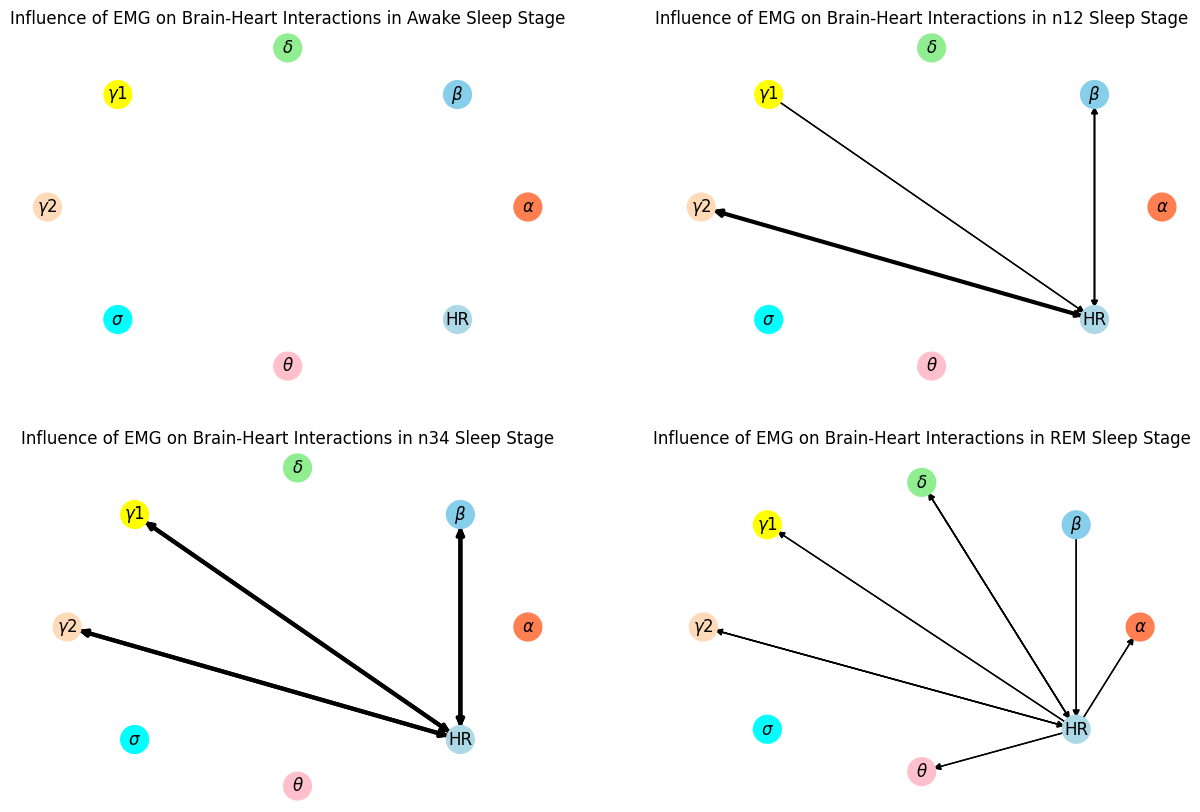

In [72]:
import networkx as nx
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
G = nx.from_numpy_array(np.array(frame_awake), create_using=nx.MultiDiGraph())
pos = nx.circular_layout(G)
nx.draw_circular(G)
node_list = [r"$\alpha$", r"$\beta$", r"$\delta$",r'$\gamma$1', r'$\gamma$2',r"$\sigma$",r"$\theta$", 'HR']
color_map = ['coral', 'skyblue', 'lightgreen','yellow','peachpuff', 'cyan', 'pink', 'lightblue']
labels = {i:node_list[i] for i in G.nodes()}
nx.draw_networkx_nodes(G,pos, node_color=color_map, node_size=400)
nx.draw_networkx_labels(G, pos, labels)
all_weights = []
#4 a. Iterate through the graph nodes to gather all the weights
for (node1,node2,data) in G.edges(data=True):
    all_weights.append(data['weight'])
unique_weights = list(set(all_weights))
plt.title('Influence of EMG on Brain-Heart Interactions in Awake Sleep Stage')
for weight in unique_weights:
    #4 d. Form a filtered list with just the weight you want to draw
    weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
    #4 e. I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
    width = weight*len(node_list)*3.0/sum(all_weights)
    nx.draw_networkx_edges(G,pos,edgelist=weighted_edges, width=3)

plt.subplot(2,2,2)
G = nx.from_numpy_array(np.array(frame_n12), create_using=nx.MultiDiGraph())
pos = nx.circular_layout(G)
nx.draw_circular(G)
node_list = [r"$\alpha$", r"$\beta$", r"$\delta$",r'$\gamma$1', r'$\gamma$2',r"$\sigma$",r"$\theta$", 'HR']
color_map = ['coral', 'skyblue', 'lightgreen','yellow','peachpuff', 'cyan', 'pink', 'lightblue']
labels = {i:node_list[i] for i in G.nodes()}
nx.draw_networkx_nodes(G,pos, node_color=color_map, node_size=400)
nx.draw_networkx_labels(G, pos, labels)
all_weights = []
#4 a. Iterate through the graph nodes to gather all the weights
for (node1,node2,data) in G.edges(data=True):
    all_weights.append(data['weight'])
unique_weights = list(set(all_weights))
plt.title('Influence of EMG on Brain-Heart Interactions in n12 Sleep Stage')
for weight in unique_weights:
    #4 d. Form a filtered list with just the weight you want to draw
    weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
    #4 e. I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
    width = weight*len(node_list)*3.0/sum(all_weights)
    nx.draw_networkx_edges(G,pos,edgelist=weighted_edges, width=weight)

plt.subplot(2,2,3)
G = nx.from_numpy_array(np.array(frame_n34), create_using=nx.MultiDiGraph())
pos = nx.circular_layout(G)
nx.draw_circular(G)
node_list = [r"$\alpha$", r"$\beta$", r"$\delta$",r'$\gamma$1', r'$\gamma$2',r"$\sigma$",r"$\theta$", 'HR']
color_map = ['coral', 'skyblue', 'lightgreen','yellow','peachpuff', 'cyan', 'pink', 'lightblue']
labels = {i:node_list[i] for i in G.nodes()}
nx.draw_networkx_nodes(G,pos, node_color=color_map, node_size=400)
nx.draw_networkx_labels(G, pos, labels)
all_weights = []
#4 a. Iterate through the graph nodes to gather all the weights
for (node1,node2,data) in G.edges(data=True):
    all_weights.append(data['weight'])
unique_weights = list(set(all_weights))
plt.title('Influence of EMG on Brain-Heart Interactions in n34 Sleep Stage')
for weight in unique_weights:
    #4 d. Form a filtered list with just the weight you want to draw
    weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
    #4 e. I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
    width = weight*len(node_list)*3.0/sum(all_weights)
    nx.draw_networkx_edges(G,pos,edgelist=weighted_edges, width=3)

plt.subplot(2,2,4)
G = nx.from_numpy_array(np.array(frame_rem), create_using=nx.MultiDiGraph())
pos = nx.circular_layout(G)
nx.draw_circular(G)
node_list = [r"$\alpha$", r"$\beta$", r"$\delta$",r'$\gamma$1', r'$\gamma$2',r"$\sigma$",r"$\theta$", 'HR']
color_map = ['coral', 'skyblue', 'lightgreen','yellow','peachpuff', 'cyan', 'pink', 'lightblue']
labels = {i:node_list[i] for i in G.nodes()}
nx.draw_networkx_nodes(G,pos, node_color=color_map, node_size=400)
nx.draw_networkx_labels(G, pos, labels)
all_weights = []
#4 a. Iterate through the graph nodes to gather all the weights
for (node1,node2,data) in G.edges(data=True):
    all_weights.append(data['weight'])
unique_weights = list(set(all_weights))
plt.title('Influence of EMG on Brain-Heart Interactions in REM Sleep Stage')

for weight in unique_weights:
    #4 d. Form a filtered list with just the weight you want to draw
    weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
    #4 e. I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
    width = weight*len(node_list)*3.0/sum(all_weights)
    nx.draw_networkx_edges(G,pos,edgelist=weighted_edges, width=weight)